# Time-Frequency-Polarization analysis: tutorial

This tutorial aims at demonstrating different tools available within the `timefrequency` module of `BiSPy`. The examples provided here come along with the paper

* Julien Flamant, Nicolas Le Bihan, Pierre Chainais: “Time-frequency analysis of bivariate signals”, In press, Applied and Computational Harmonic Analysis, 2017; [arXiv:1609.0246]( http://arxiv.org/abs/1609.02463), [doi:10.1016/j.acha.2017.05.007](https://doi.org/10.1016/j.acha.2017.05.007).

The paper contains theoretical results and several applications that can be reproduced with the following tutorial. 

## Load `bispy` and necessary modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import quaternion  # load the quaternion module
import bispy as bsp

## Quaternion Short-Term Fourier Transform (Q-STFT) example

To illustrate the behaviour of the Q-STFT, we construct a simple signal made of two linear chirps, each having its own instantaneous polarization properties. 

First, define some constants:

In [3]:
N = 1024 # length of the signal

# linear chirps constants
a = 250*np.pi
b = 50*np.pi
c = 150*np.pi

Then define the instantaneous amplitudes, orientation, ellipticity and phase of each linear chirp. The amplitudes are taken equal - just a Hanning window. 

In [4]:
# time vector
t = np.linspace(0, 1, N)

# first chirp
theta1 = np.pi/4 # constant orientation
chi1 = np.pi/6-t # reversing ellipticity
phi1 = b*t+a*t**2 # linear chirp

# second chirp
theta2 = np.pi/4*10*t # rotating orientation
chi2 = 0 # constant null ellipticity
phi2 = c*t+a*t**2 # linear chirp

# common amplitude -- simply a window
env = bsp.utils.windows.hanning(N)

We can now construct the two components and sum it. To do so, we use the function `signals.bivariateAMFM` to compute directly the quaternion embeddings of each linear chirp. 

In [5]:
# define chirps x1 and x2
x1 = bsp.signals.bivariateAMFM(env, theta1, chi1, phi1)
x2 = bsp.signals.bivariateAMFM(env, theta2, chi2, phi2)

# sum it
x = x1 + x2

Let us have a look at the signal `x[t]`

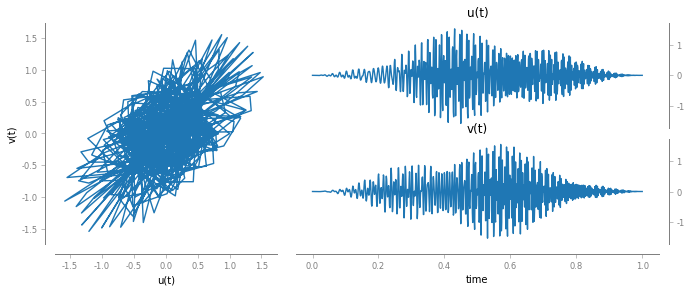

In [8]:
fig, ax = bsp.utils.visual.plot2D(t, x)

Now we can compute the Q-STFT. First initialize the object Q-STFT

In [9]:
S = bsp.timefrequency.QSTFT(x, t)

And compute:

In [12]:
S.compute(window='hamming', nperseg=101, noverlap=100, nfft=N)

Computing Time-Frequency Stokes parameters


Let us have a look at Time-Frequency Stokes parameters S1, S2 and S3

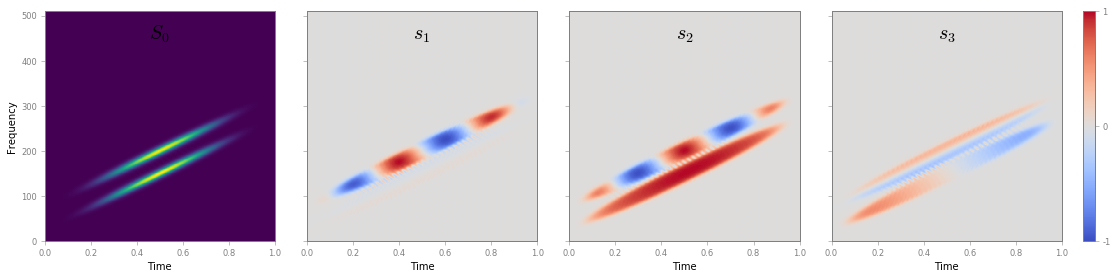

In [13]:
fig, ax = S.plotStokes()

Alternatively, we can compute the instantaneous polarization properties from the ridges of the Q-STFT.

Extract the ridges:

In [14]:
S.extractRidges()

Extracting ridges
Ridge added
Ridge added
2 ridges were recovered.


And plot (`quivertdecim` controls the time-decimation of the quiver plot, for a cleaner view):

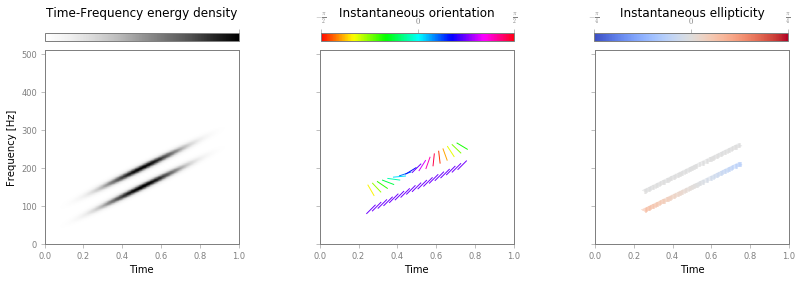

In [15]:
fig, ax = S.plotRidges(quivertdecim=30)

The two representations are equivalent and provide the same information: time, frequency and polarization properties of the bivariate signal. A direct inspection shows that instantaneous parameters of each components are recovered by both representations. 

## Quaternion Continuous Wavelet Transform (Q-CWT) example

The Q-STFT method has the same limitations as the usual STFT, that is not the ideal tool to analyze signals spanning a wide range of frequencies over short time scales. We revisit here the classic two chirps example in its bivariate (polarized) version. 

As before, let us first define some constants:

In [16]:
N = 1024 # length of the signal

# hyperbolic chirps parameters
alpha = 15*np.pi
beta = 5*np.pi
tup = 0.8 # set blow-up time value

Now, let us define the instantaneous amplitudes, orientation, ellipticity and phase of each linear chirp. The chirps are also windowed. 

In [17]:
t = np.linspace(0, 1, N) # time vector

# chirp 1 parameters
theta1 = -np.pi/3 # constant orientation
chi1 = np.pi/6 # constant ellipticity
phi1 = alpha/(.8-t) # hyperbolic chirp

# chirp 2 parameters
theta2 = 5*t # rotating orientation
chi2 = -np.pi/10 # constant ellipticity
phi2 = beta/(.8-t) # hyperbolic chirp

# envelope
env = np.zeros(N)
Nmin = int(0.1*N) # minimum value of N such that x is nonzero
Nmax = int(0.75*N) # maximum value of N such that x is nonzero

env[Nmin:Nmax] = bsp.utils.windows.hanning(Nmax-Nmin)

Construct the two components and sum it. Again we use the function `utils.bivariateAMFM` to compute directly the quaternion embeddings of each linear chirp.

In [27]:
x1  = bsp.signals.bivariateAMFM(env, theta1, chi1, phi1)
x2  = bsp.signals.bivariateAMFM(env, theta2, chi2, phi2)

x = x1 + x2

Let us visualize the resulting signal, `x[t]`

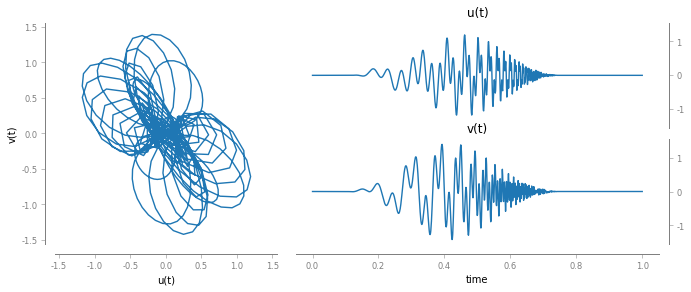

In [28]:
fig, ax = bsp.utils.visual.plot2D(t, x)

Now, we can compute its Q-CWT. First define the wavelet parameters and initialize the QCWT object:

In [29]:
waveletParams = dict(type='Morse', beta=12, gamma=3)
S = bsp.timefrequency.QCWT(x, t)

And compute:

In [30]:
fmin = 0.01
fmax = 400
S.compute(fmin, fmax, waveletParams, N)

Computing Time-Frequency Stokes parameters


Let us have a look at Time-Scale Stokes parameters S1, S2 and S3

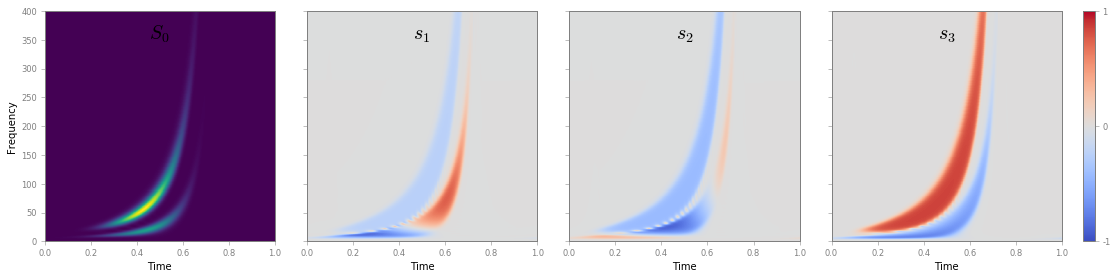

In [31]:
fig, ax = S.plotStokes()

Similarly we can compute the instantaneous polarization attributes from the ridges of the Q-CWT.

In [32]:
S.extractRidges()

Extracting ridges
Ridge added
Ridge added
2 ridges were recovered.


And plot the results

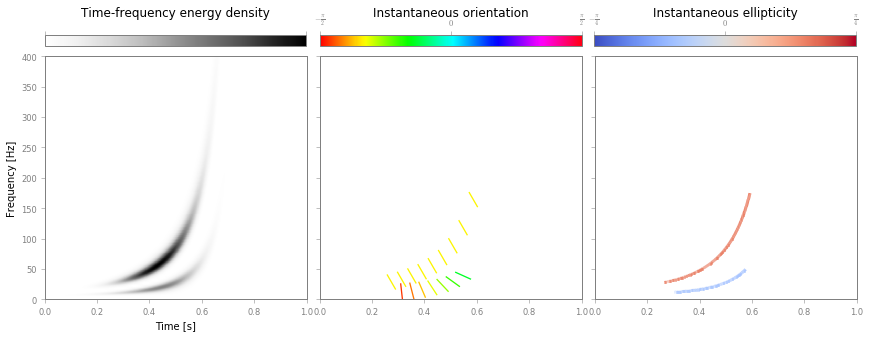

In [33]:
fig, ax = S.plotRidges(quivertdecim=40)

Again, both representations are equivalent and provide the same information: time, scale and polarization properties of the bivariate signal. A direct inspection shows that instantaneous parameters of each components are recovered by both representations. 